In [12]:
import pandas as pd
import joblib

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [2]:
train_dataset = pd.read_json('./dataset/train_data.jsonl')
val_dataset = pd.read_json('./dataset/val_data.jsonl')
test_dataset = pd.read_json('./dataset/test_data.jsonl')

In [3]:
X_train = train_dataset['text']
y_train = train_dataset['positive']
X_val = val_dataset['text']
y_val = val_dataset['positive']
X_test = test_dataset['text']
y_test = test_dataset['positive']

# Naive Bayes
- Combine title and content text data by concatenation

Compare two feature extracting methods. 
1. CountVectorizer
2. TD-IDF

In [ ]:
X_train = train_dataset['title'] + " " + train_dataset['text']
X_val = val_dataset['title'] + " " + val_dataset['text']
X_test = test_dataset['title'] + " " + test_dataset['text']

In [13]:
def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_plot = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
    roc_plot.plot()

In [23]:
def train_clf(pipe, X_train, y_train, X_test, y_test):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
    plot_roc_curve(y_test, y_pred)

Accuracy: 91.98%
              precision    recall  f1-score   support

           0       0.70      0.63      0.66     25695
           1       0.95      0.96      0.95    180163

    accuracy                           0.92    205858
   macro avg       0.82      0.79      0.81    205858
weighted avg       0.92      0.92      0.92    205858



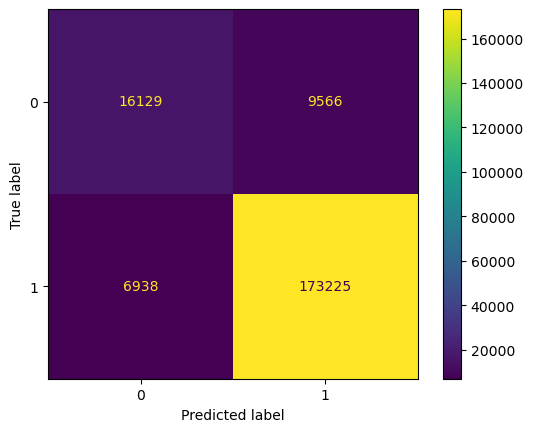

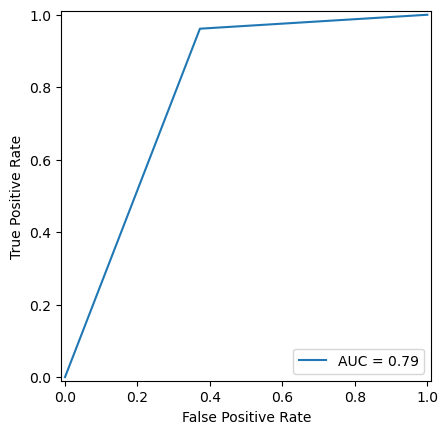

In [27]:
cnt_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB(alpha=1.0)),
])
train_clf(cnt_pipe, X_train, y_train, X_test, y_test)

Accuracy: 88.19%
              precision    recall  f1-score   support

           0       0.95      0.06      0.11     25695
           1       0.88      1.00      0.94    180163

    accuracy                           0.88    205858
   macro avg       0.92      0.53      0.52    205858
weighted avg       0.89      0.88      0.83    205858



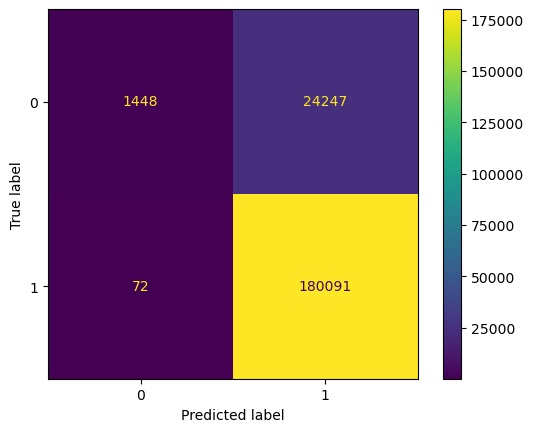

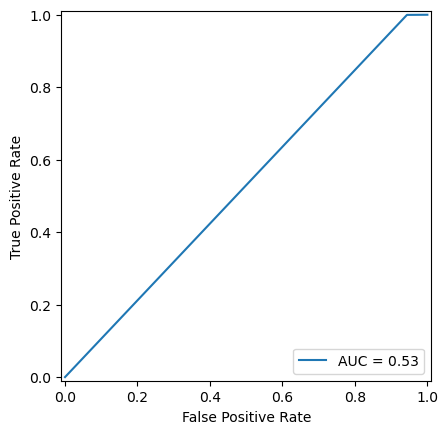

In [31]:
tf_pipe = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB(alpha=1.0)),
])
train_clf(tf_pipe, X_train, y_train, X_test, y_test)

Experiment ngram_range=(1,2)

Accuracy: 91.02%
              precision    recall  f1-score   support

           0       0.94      0.30      0.46     25695
           1       0.91      1.00      0.95    180163

    accuracy                           0.91    205858
   macro avg       0.92      0.65      0.70    205858
weighted avg       0.91      0.91      0.89    205858



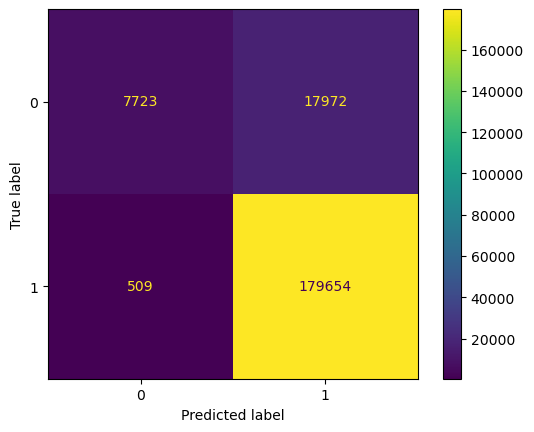

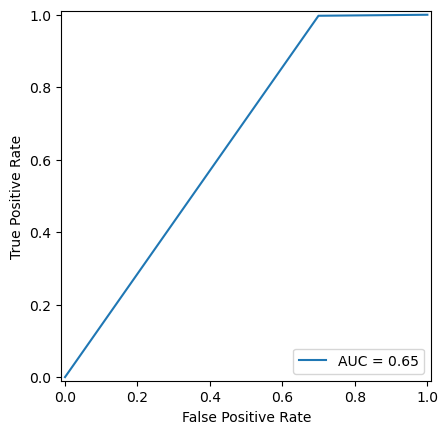

In [29]:
gram2_pipe = Pipeline([
    ('vect', CountVectorizer(ngram_range=(2,2))),
    ('clf', MultinomialNB(alpha=1.0)),
])
train_clf(gram2_pipe, X_train, y_train, X_test, y_test)

Accuracy: 90.03%
              precision    recall  f1-score   support

           0       0.97      0.21      0.34     25695
           1       0.90      1.00      0.95    180163

    accuracy                           0.90    205858
   macro avg       0.93      0.60      0.64    205858
weighted avg       0.91      0.90      0.87    205858



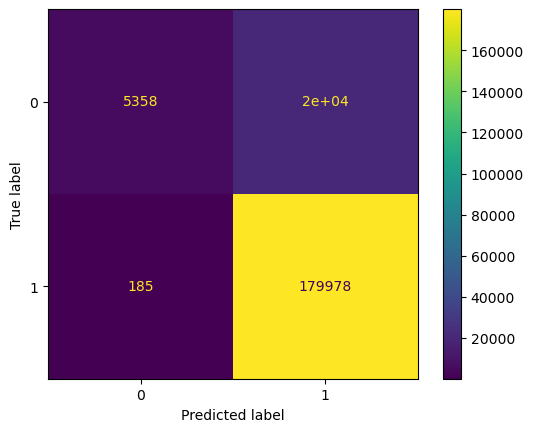

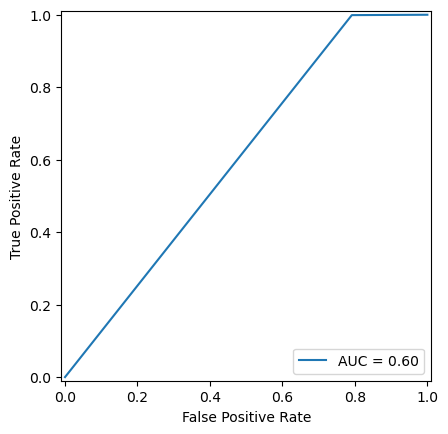

In [30]:
gram12_pipe = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('clf', MultinomialNB(alpha=1.0)),
])
train_clf(gram12_pipe, X_train, y_train, X_test, y_test)

In [ ]:
joblib.dump(cnt_pipe, './weight/nb_best.pkl')

['./weight/nb_best.pkl']

# RNN
- Create two parallel LSTM branches—one for review text, one for title text—and then concatenate their final hidden states. 

# References
- Data: https://amazon-reviews-2023.github.io/data_loading/jsonl.html
- https://www.kaggle.com/code/mehmetisik/amazon-reviews-boosting-sales-sentiment-analysis
- https://github.com/reasonmii/project-toxic-comment-classification/blob/main/Yuna-Supervised/Toxic-Classification.ipynb
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_text_feature_extraction.html

Naive Bayes
- https://www.kaggle.com/code/ankumagawa/sentimental-analysis-using-naive-bayes-classifier

LSTM
- https://github.com/bentrevett/pytorch-sentiment-analysis/blob/main/2%20-%20Recurrent%20Neural%20Networks.ipynb